# Visualizacion de Resultados

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import numpy as np
import json 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from glob import glob
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.io import loadmat
from matplotlib.gridspec import GridSpec

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"], # O la fuente que prefieras (ej. 'Times New Roman')
})

ToChange = {'phq_score':'PHQ-Score', 'edad':'Edad', 'sexo_Mujer':'Es Mujer',
        'niveleduc_Educacion Basica o Preparatoria incompleta': 'Basica Incompleta',
       'niveleduc_Educacion Media o Humanidades completa': 'Media completa',
       'niveleduc_Educacion Media o Humanidades incompleta': 'Media Incompleta',
       'niveleduc_Estudios de posgrado (magister o doctorado)': 'Posgrado',
       'niveleduc_Sin estudios': 'Sin Estudios', 
       'niveleduc_Tecnica Superior completa': 'Tecnica Sup. Completa',
       'niveleduc_Tecnica Superior incompleta': 'Tecnica Sup. Incompleta',
       'niveleduc_Universitaria completa': 'Universitaria Completa',
       'niveleduc_Universitaria incompleta': 'Universitaria Incompleta',
        'estadocivil_Casado legalmente': 'Casado/a',
        'estadocivil_Conviviente con Acuerdo de Union Civil': 'Acuerdo Union Civil (AUC)',
        'estadocivil_Conviviente sin Acuerdo de Union Civil': 'Conviviente Sin AUC',
        'estadocivil_Divorciado': 'Divorciado', 
        'estadocivil_Otro. Especifique': 'Otro',
        'estadocivil_Separado (casado legalmente, pero no vive con su esposo/a)':'Separado sin Divorcio Legal',
        'estadocivil_Soltero': 'Soltero/a', 
        'estadocivil_Viudo': 'Viudo/a',
        'intercept': 'Incercepto',
        'estadocivil_NoData': 'Estado Civil S/R',
        'niveleduc_NoData': 'Educacion S/R'}

### Pregunta 1 

In [2]:
path = '../results/problema_1/'
train_logs = pd.read_csv(os.path.join(path, 'train_logs.csv'))
results_p1 = pd.read_csv(os.path.join(path, 'results.csv'))

results_p1

,Predictor,Beta_Estimado,se,emarginal
0,intercept,0.211078,0.020804,0.08340
1,phq_score,-0.018526,0.002542,-0.00732


C:\Users\copper\AppData\Local\Temp\ipykernel_24676\1211174346.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


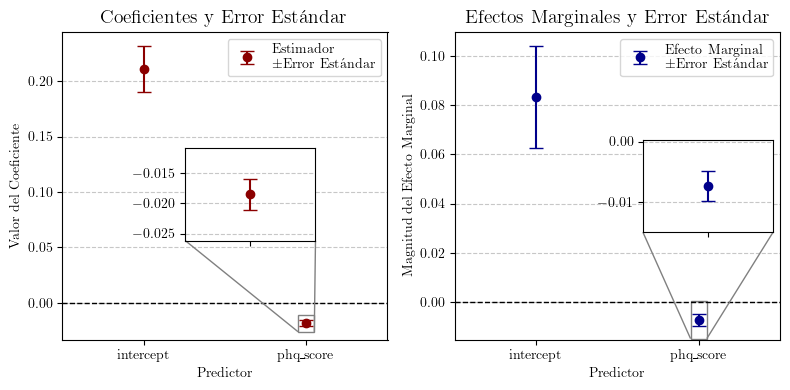

In [3]:
# 1. Crear la figura con dos subplots.
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# --- Gráfico 1: Coeficientes y Errores Estándar (Sin cambios) ---
axes[0].errorbar(
    x=results_p1['Predictor'],
    y=results_p1['Beta_Estimado'],
    yerr=results_p1['se'],
    fmt='o',
    linestyle='',
    capsize=5,
    label='Estimador\n'+r'$\pm$Error Estándar',
    color='darkred'
)
axes[0].axhline(y=0, color='k', linestyle='--', linewidth=1)
axes[0].set_title('Coeficientes y Error Estándar', fontsize=14)
axes[0].set_ylabel('Valor del Coeficiente')
axes[0].set_xlabel('Predictor')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_xlim(-0.5, 1.5)
# --- Zoom en Gráfico 1 (Sin cambios) ---
variable_to_zoom_1 = 'phq_score'
try:
    predictors_1 = results_p1['Predictor'].tolist()
    var_index_1 = predictors_1.index(variable_to_zoom_1)
    zoom_data_1 = results_p1.iloc[var_index_1]
    beta = zoom_data_1['Beta_Estimado']
    se = zoom_data_1['se']
    
    axins1 = inset_axes(axes[0], width="40%", height="30%", loc='lower right',
                       bbox_to_anchor=(-0.2, 0.3, 1, 1),
                       bbox_transform=axes[0].transAxes)
    axins1.errorbar(x=results_p1['Predictor'], y=results_p1['Beta_Estimado'], yerr=results_p1['se'],
                   fmt='o', linestyle='', capsize=5, color='darkred')
    
    x1, x2 = var_index_1 - 0.05, var_index_1 + 0.05
    y1, y2 = beta - 3 * se, beta + 3 * se
    axins1.set_xlim(x1, x2)
    axins1.set_ylim(y1, y2)
    axins1.set_xticklabels([])
    axins1.grid(axis='y', linestyle='--', alpha=0.7)
    mark_inset(axes[0], axins1, loc1=4, loc2=3, fc="none", ec="0.5")
except (ValueError, IndexError):
    print(f"Advertencia: La variable '{variable_to_zoom_1}' no se encontró para el zoom en el gráfico 1.")

# --- Gráfico 2: Efectos Marginales (MODIFICADO) ---
# Filtrar filas sin efecto marginal
df_me = results_p1.dropna(subset=['emarginal']).copy()
df_me.reset_index(drop=True, inplace=True) # Resetear el índice para una selección limpia

axes[1].errorbar(
    x=df_me['Predictor'],
    y=df_me['emarginal'],
    yerr=df_me['se'],  # Asumiendo que 'se' también es el error estándar para el efecto marginal
    fmt='o',
    linestyle='',
    capsize=5,
    label='Efecto Marginal\n'+r'$\pm$Error Estándar',
    color='darkblue'
)
axes[1].axhline(y=0, color='k', linestyle='--', linewidth=1)
axes[1].set_title('Efectos Marginales y Error Estándar', fontsize=14)
axes[1].set_ylabel('Magnitud del Efecto Marginal')
axes[1].set_xlabel('Predictor')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_xlim(-0.5, 1.5)

# --- INICIO DE LA SECCIÓN DE ZOOM PARA GRÁFICO 2 ---
# Hacer zoom en el segundo componente de la lista de efectos marginales
if len(df_me) > 1:
    variable_to_zoom_2 = df_me['Predictor'].iloc[1] # Selecciona el segundo predictor
    
    try:
        predictors_2 = df_me['Predictor'].tolist()
        var_index_2 = predictors_2.index(variable_to_zoom_2)
        
        zoom_data_2 = df_me.iloc[var_index_2]
        em = zoom_data_2['emarginal']
        se_em = zoom_data_2['se']
        
        axins2 = inset_axes(axes[1], width="40%", height="30%", loc='center right')

        axins2.errorbar(
            x=df_me['Predictor'],
            y=df_me['emarginal'],
            yerr=df_me['se'],
            fmt='o',
            linestyle='',
            capsize=5,
            color='darkblue'
        )
        
        x1_zoom, x2_zoom = var_index_2 - 0.05, var_index_2 + 0.05
        y1_zoom, y2_zoom = em - 3 * se_em, em + 3 * se_em
        axins2.set_xlim(x1_zoom, x2_zoom)
        axins2.set_ylim(y1_zoom, y2_zoom)
        
        axins2.set_xticklabels([])
        axins2.grid(axis='y', linestyle='--', alpha=0.7)
        
        mark_inset(axes[1], axins2, loc1=4, loc2=3, fc="none", ec="0.5")

    except (ValueError, IndexError):
        print(f"Advertencia: La variable '{variable_to_zoom_2}' no se encontró para el zoom en el gráfico 2.")
else:
    print("Advertencia: No hay suficientes datos de efectos marginales para crear un zoom.")


fig.savefig(os.path.join(path, 'coeff_effect.png'), dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [4]:
maxll = float(train_logs['MaxL'].values[0])
niter = train_logs['iterations'].values[0]
print('Min likelihood: {:.2f}\nConvergencia: {} iteraciones'.format(maxll, niter))

Min likelihood: -5822.57
Convergencia: 4 iteraciones


### Pregunta 2

In [5]:
path_2 = '../results/problema_2/'
f_values = pd.read_csv(os.path.join(path_2, 'f_values.csv'))
results_p2    = pd.read_csv(os.path.join(path_2, 'results.csv'))
results_p2.sample()
results_p2['Label'] = results_p2['Predictor'].replace(ToChange)

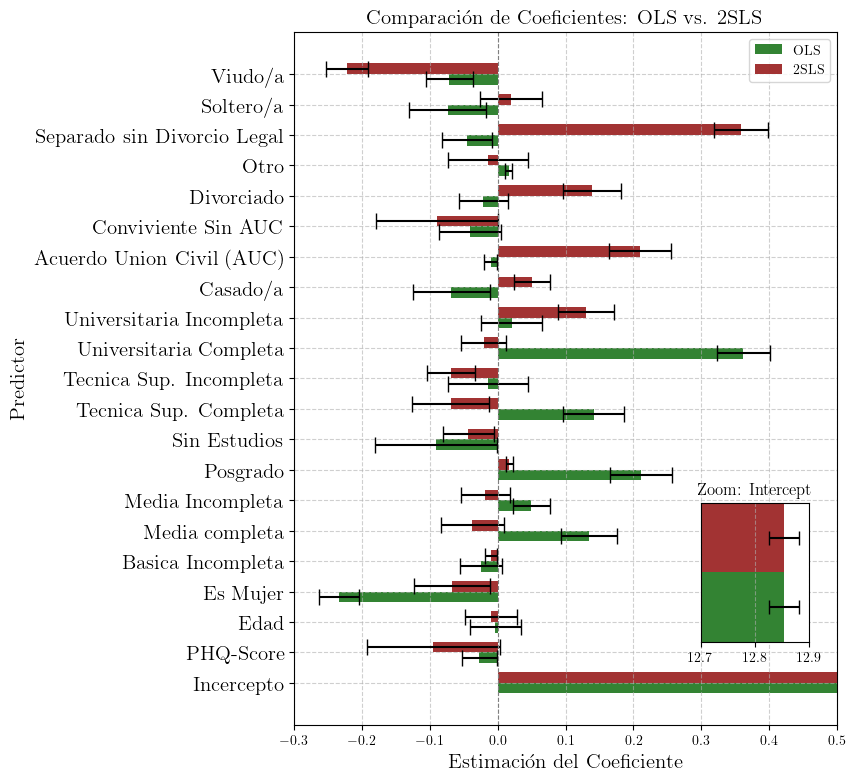

In [6]:
# --- Inicio del Código del Gráfico ---

fig, ax = plt.subplots(figsize=(7, 9))

# Definir las posiciones y el ancho de las barras
predictors = results_p2['Label']
x = np.arange(len(predictors))
width = 0.35

# 1. DIBUJAR LAS BARRAS ORIGINALES
# Esto no cambia, se dibujan todas las barras
ax.barh(x - width/2, results_p2['Beta_Estimado'], width, label='OLS', 
        xerr=results_p2['se'], capsize=6, color='darkgreen', alpha=0.8)

ax.barh(x + width/2, results_p2['Beta_Estimado_2sls'], width, label='2SLS', 
        xerr=results_p2['se_2sls'], capsize=6, color='darkred', alpha=0.8)

# --- Añadir Títulos, Etiquetas y Leyenda ---
ax.set_xlabel('Estimación del Coeficiente', fontsize=15)
ax.set_ylabel('Predictor', fontsize=15)
ax.set_title('Comparación de Coeficientes: OLS vs. 2SLS', fontsize=15)
ax.set_yticks(x)
ax.set_yticklabels(predictors, fontsize=15)
ax.legend()
ax.axvline(0, color='grey', linewidth=0.8, linestyle='--')
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Asegurarse de que el eje X tenga espacio para ver todas las barras, incluida la más larga
ax.set_xlim(left=-0.5, right=12)


# 2. CREAR EL RECUADRO DE ZOOM (INSET)
# inset_axes crea un nuevo "lienzo" dentro del gráfico principal
# Lo ubicamos en una zona que no tape información importante, ej: 'center right'
axins = inset_axes(ax, 
                   width="20%", height="20%", loc='lower right',
                                         bbox_to_anchor=(0.0, 0.08, 1, 1),
                       bbox_transform=ax.transAxes,
                   borderpad=2)          # Espacio respecto al borde

# 3. DIBUJAR LOS DATOS OTRA VEZ DENTRO DEL ZOOM
# Dibujamos lo mismo, pero los límites del 'axins' actuarán como una lupa
axins.barh(x - width/2, results_p2['Beta_Estimado'], width, xerr=results_p2['se'], capsize=5, color='darkgreen', alpha=0.8)
axins.barh(x + width/2, results_p2['Beta_Estimado_2sls'], width, xerr=results_p2['se_2sls'], capsize=5, color='darkred', alpha=0.8)


# 4. DEFINIR QUÉ SE VERÁ DENTRO DEL ZOOM
# --- Eje Y del Zoom ---
# Queremos ver solo la última barra. Su posición en Y es la última del array 'x'.
last_bar_y_pos = x[0]
axins.set_ylim(last_bar_y_pos - width, last_bar_y_pos + width) # Centra la vista en la última barra

# --- Eje X del Zoom ---
# Centramos la vista horizontal alrededor de los valores de la última barra
last_beta_1 = results_p2['Beta_Estimado'].iloc[-1]
last_beta_2 = results_p2['Beta_Estimado_2sls'].iloc[-1]
axins.set_xlim(12.7, 12.9)

# Ocultar las etiquetas del eje Y en el zoom para que sea más limpio
axins.set_yticks([])
axins.set_title('Zoom: Intercept') # Añadir un título al zoom
axins.grid(axis='x', linestyle='--', alpha=0.6)

ax.set_xlim(-0.3, 0.5)
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
# --- Finalizar y mostrar el gráfico ---
fig.savefig(os.path.join(path_2, 'comp_olsvs2sls.png'), dpi=300, bbox_inches='tight')
plt.show()

### Problema 3

In [7]:
paths = glob(os.path.join('../results/', 'problema_3*'))

In [8]:
paths = ['../results\\problema_3', '../results\\problema_3_with_nan', '../results\\problema_3_no_sexo',]

In [34]:
paths_2 = ['../results\\problema_3_normalized', '../results\\problema_3_no_sexo_normalized', '../results\\problema_3_with_nan_normalized']

In [35]:
group_1 = ['phq_score', 'edad', 'sexo_Mujer']
group_0 = ['niveleduc_Educacion Basica o Preparatoria incompleta',
       'niveleduc_Educacion Media o Humanidades completa',
       'niveleduc_Educacion Media o Humanidades incompleta',
       'niveleduc_Estudios de posgrado (magister o doctorado)',
       'niveleduc_Sin estudios', 'niveleduc_Tecnica Superior completa',
       'niveleduc_Tecnica Superior incompleta',
       'niveleduc_Universitaria completa',
       'niveleduc_Universitaria incompleta', 'niveleduc_NoData']

group_2 = ['estadocivil_Casado legalmente',
        'estadocivil_Conviviente con Acuerdo de Union Civil',
        'estadocivil_Conviviente sin Acuerdo de Union Civil',
        'estadocivil_Divorciado', 'estadocivil_Otro. Especifique',
        'estadocivil_Separado (casado legalmente, pero no vive con su esposo/a)',
        'estadocivil_Soltero', 'estadocivil_Viudo', 'estadocivil_NoData']
columns_to_select = [group_0, group_1, group_2]

(22, 4)
(22, 4)
(22, 4)


C:\Users\copper\AppData\Local\Temp\ipykernel_24676\2013829826.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0.03, 1, 0.97])


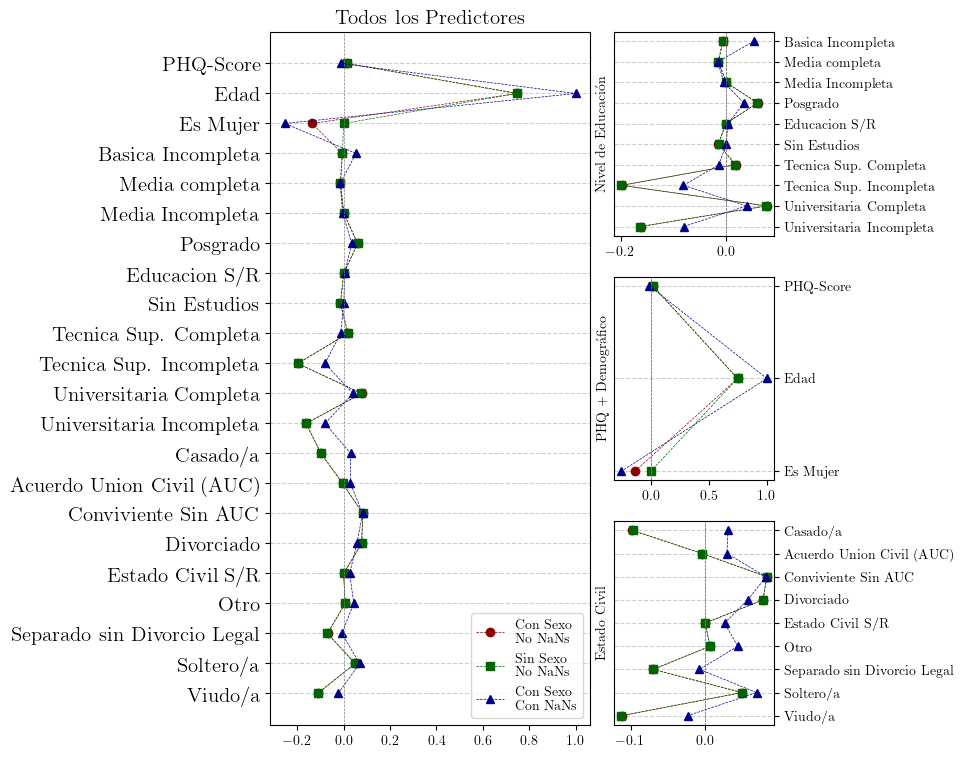

In [36]:
# 1. CREAR LA FIGURA Y EL GRIDSPEC VERTICAL
# Rejilla de 3 filas y 2 columnas.
# La columna izquierda (índice 0) será el doble de ancha que la derecha.
fig = plt.figure(figsize=(6.5, 9)) 
gs = GridSpec(nrows=3, ncols=2, figure=fig, width_ratios=[2, 1], wspace=0.1)

# 2. AÑADIR LOS EJES (SUBPLOTS) AL GRID
# ax_all ocupa toda la columna izquierda
ax_all = fig.add_subplot(gs[:, 0])
# Los otros 3 ejes ocupan las celdas de la columna derecha
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[2, 1])

# 3. CREAR UNA LISTA CON LOS EJES DE LA DERECHA PARA EL BUCLE
axes_right = [ax1, ax2, ax3]

# --- CÓDIGO DE BUCLE MODIFICADO ---
markers = ['o', 's', '^']
linestyle= ['--', '--', '--']#['--', '-', ':']
colors = ['darkred', 'darkgreen', 'darkblue']

final_results_df = None # Para guardar el último dataframe
largest_df = pd.read_csv(os.path.join(paths[1], 'results.csv'))


for k, path in enumerate(paths_2):
    results_df = pd.read_csv(os.path.join(path, 'results.csv'))
    results_df = pd.merge(results_df, largest_df.iloc[:, :1], on='Predictor', how='right').fillna(0.)
    file_path = os.path.join(path, 'config.json')
    with open(file_path, 'r', encoding='utf-8') as f:
        # La función json.load() lee el archivo y lo convierte en un diccionario de Python
        config_data = json.load(f)

        if 'sexo_Mujer' in config_data['vars']['independent']:
            title='Con Sexo'
        else:
            title='Sin Sexo'

        if config_data['on_missing'] == 'delete':
            title+='\nNo NaNs'
        else:
            title+='\nCon NaNs'
            
    final_results_df = results_df # Guardamos la referencia
    final_results_df['Label'] = final_results_df['Predictor'].replace(ToChange)
    print(final_results_df.shape)
    # --- Ploteo en el gráfico principal de la izquierda (ax_all) ---
    y_all = np.arange(len(results_df['Label']))
    ax_all.plot(results_df['Beta_Estimado'], y_all, marker=markers[k], label=title, color=colors[k], linestyle=linestyle[k], linewidth=0.5)

    # --- Ploteo en los 3 gráficos de la derecha (usando `axes_right`) ---
    for index, cts in enumerate(columns_to_select):
        ax_subgroup = axes_right[index] # Eje actual
        group_df = results_df[results_df['Predictor'].isin(cts)]
        if group_df.empty:
            continue
            
        y_group = np.arange(len(group_df['Label']))
        
        ax_subgroup.plot(group_df['Beta_Estimado'], y_group, marker=markers[k], label=title, color=colors[k], linestyle=linestyle[k], linewidth=0.5)
        
        if k == 0:
            ax_subgroup.set_yticks(y_group)
            ax_subgroup.set_yticklabels(group_df['Label'], rotation=0)
        
        ax_subgroup.grid(True, axis='y', linestyle='--', alpha=0.6)
        ax_subgroup.axvline(0, color='gray', linestyle='--', linewidth=0.5)
        
        # --- CLAVE: Mover los ticks y etiquetas a la derecha ---
        ax_subgroup.yaxis.tick_right()

# --- CONFIGURACIÓN FINAL (FUERA DEL BUCLE) ---

# Configurar el gráfico principal (izquierda)
ax_all.set_title('Todos los Predictores', fontsize=15)
ax_all.grid(True, axis='y', linestyle='--', alpha=0.6)
ax_all.axvline(0, color='gray', linestyle='--', linewidth=0.5)
ax_all.legend()
if final_results_df is not None:
    y_ticks_final = np.arange(len(final_results_df['Label']))
    ax_all.set_yticks(y_ticks_final)
    ax_all.set_yticklabels(final_results_df['Label'], rotation=0, fontsize=15)
ax_all.invert_yaxis() # Invertir el eje para que coincida con la lectura de arriba a abajo


# Configurar los gráficos de la derecha
axes_right[0].set_ylabel('Nivel de Educación')
axes_right[1].set_ylabel('PHQ + Demográfico')
axes_right[2].set_ylabel('Estado Civil')
for ax in axes_right:
    ax.invert_yaxis() # Invertir también estos ejes para consistencia

# fig.suptitle('Comparación Vertical de Modelos', fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.97]) 
fig.savefig(os.path.join('../figures', 'predictores_exp.png'), dpi=300, bbox_inches='tight')
plt.show()

In [40]:
data = loadmat('../results/problema_3_with_nan/data.mat')
X = data['inputDataStruct']['X'][0][0][:, 1:]
num_columnas = X.shape[-1]
X = (X - np.mean(X, 0))/np.std(X, axis=0)

In [52]:
largest_df['Label'] = largest_df['Predictor'].replace(ToChange)
labels = largest_df['Label'] .values

In [58]:
indices = np.argsort(np.std(X, axis=0), axis=0)
labels = labels[indices]
X = X[:, indices]

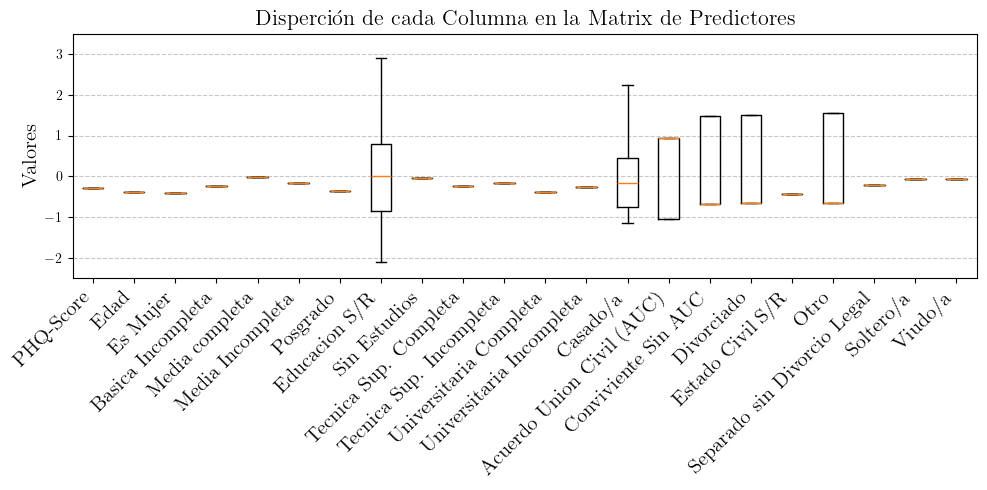

In [72]:
# Crear el boxplot directamente desde la matriz X
plt.figure(figsize=(10, 5))
plt.boxplot(X, showfliers=False,)

# Añadir títulos y etiquetas
plt.title('Disperción de cada Columna en la Matrix de Predictores', fontsize=16)
# plt.xlabel('Columnas de la Matriz (Variables)', fontsize=12)
plt.ylabel('Valores', fontsize=15)
plt.xticks(ticks=np.arange(1, num_columnas + 1), 
           labels=largest_df['Label'], 
           rotation=45, ha="right", fontsize=15)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim(-2.5, 3.5)
plt.savefig(os.path.join('../figures', 'dispercion.png'), dpi=300, bbox_inches='tight')
plt.show()

In [74]:
datafg = pd.read_csv('../data/depresion_clean.csv')

In [92]:
sex_changed = []
for g, p in datafg.groupby('id'):
    if len(p['sexo'].unique()) > 1:
        sex_changed.append(g)
len(sex_changed)

33